In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../course_notebooks/DATA/gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


3000


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

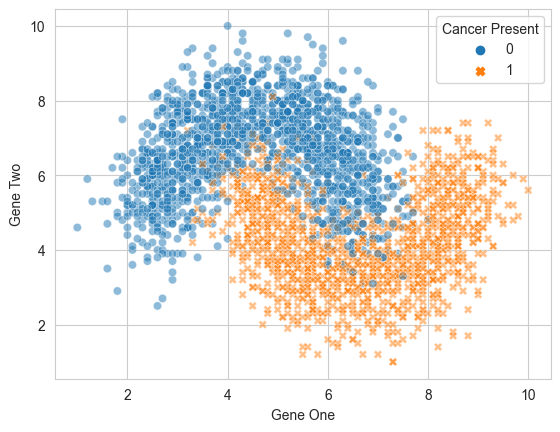

In [2]:
print(len(df))
sns.scatterplot(df,x='Gene One',y='Gene Two',hue='Cancer Present',style='Cancer Present',alpha=0.5)

(4.0, 7.0)

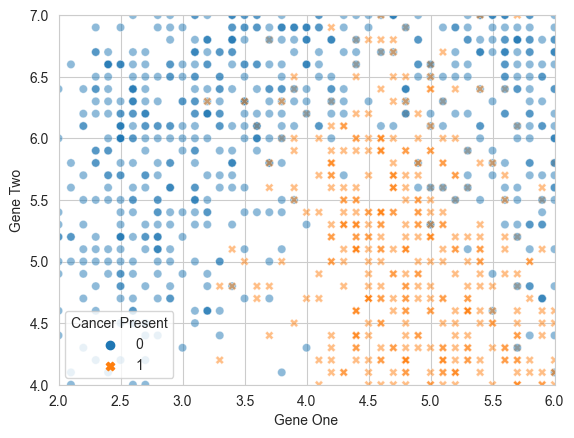

In [3]:
sns.scatterplot(df,x='Gene One',y='Gene Two',hue='Cancer Present',style='Cancer Present',alpha=0.5)
plt.xlim(2,6)
plt.ylim(4,7)

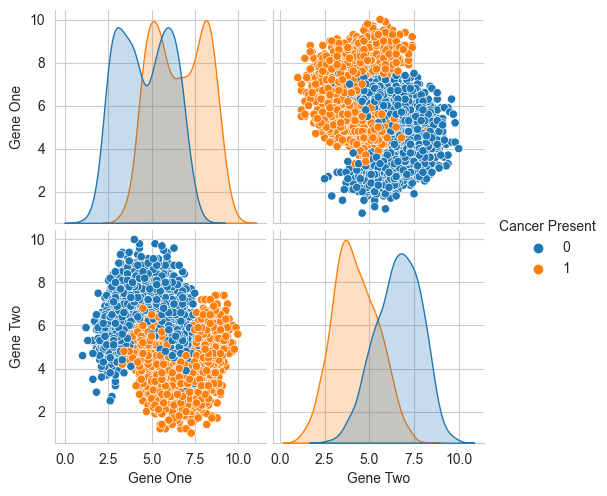

In [4]:
sns.pairplot(df,hue='Cancer Present')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
x = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [8]:
scaler = StandardScaler()
s_x_train = scaler.fit_transform(x_train)
s_x_test = scaler.transform(x_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [12]:
knn_model.fit(s_x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
y_pred = knn_model.predict(s_x_test)

In [14]:
from sklearn.metrics import confusion_matrix,classification_report

In [15]:
confusion_matrix(y_test,y_pred)

array([[382,  41],
       [ 34, 443]], dtype=int64)

In [16]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.92      0.93      0.92       477

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900



In [17]:
from sklearn.metrics import accuracy_score

In [19]:
test_error_rates = []
for k in range(1,30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(s_x_train,y_train)
    y_pred_test = model.predict(s_x_test)
    test_accuracy = accuracy_score(y_test,y_pred_test)
    test_error = 1-test_accuracy
    test_error_rates.append(test_error)


In [21]:
test_error_rates


[0.08333333333333337,
 0.0922222222222222,
 0.07111111111111112,
 0.06555555555555559,
 0.06444444444444442,
 0.05888888888888888,
 0.06555555555555559,
 0.06333333333333335,
 0.06555555555555559,
 0.06333333333333335,
 0.06888888888888889,
 0.06333333333333335,
 0.06444444444444442,
 0.06222222222222218,
 0.06777777777777783,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06333333333333335,
 0.06222222222222218,
 0.06222222222222218,
 0.06444444444444442,
 0.061111111111111116,
 0.06000000000000005,
 0.06222222222222218,
 0.06555555555555559,
 0.06222222222222218,
 0.061111111111111116,
 0.06222222222222218]

TypeError: 'str' object is not callable

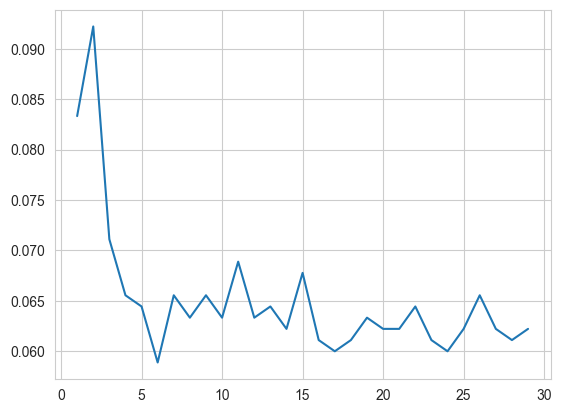

In [28]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('Error rate')
plt.xlabel('K neighbors')


In [29]:
# PIPELINE -> GRIDSEARCH CV
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [30]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [42]:
operations = [('scaler',scaler),('knn',knn)]
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)
from sklearn.model_selection import GridSearchCV
k_values = list(range(1,30))
# chosen_string_name+two_underscores+parameter_name
# knn__n_neighbors
param_grid = {'knn__n_neighbors':k_values}

In [43]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [44]:
full_cv_classifier.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [45]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=21))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=21),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 21,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [46]:
full_cv_classifier.best_score_

0.9319047619047618

In [47]:
print(classification_report(y_test,full_cv_classifier.predict(x_test)))


              precision    recall  f1-score   support

           0       0.94      0.93      0.93       423
           1       0.94      0.95      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900

